### Import the dataset (from 24th April 2022 to 17 May 2022) 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (14, 7)
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('curved_labelled_data.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)

### Plotting the dataset 

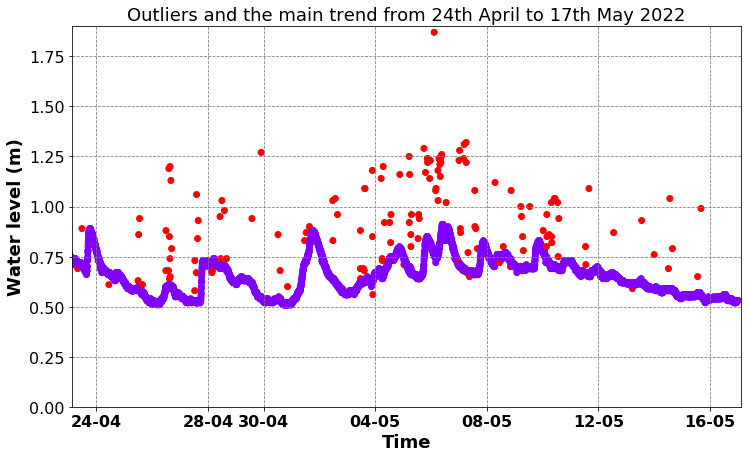

In [4]:
plt.rcParams['figure.figsize'] = (12, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.scatter(df['time'],df['height'], c= df['data_label'], cmap='rainbow')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Outliers and the main trend from 24th April to 17th May 2022', fontsize=18)
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-24 00:00:00'],['2022-05-17 23:59:59'])
ax.set_ylim(0, 1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.set(facecolor = "white")

plt.savefig('sample_photo_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [5]:
from sklearn.neighbors import LocalOutlierFactor
import datetime as datetime
import numpy as np

In [6]:
length = np.array(df.height)

### first trial 

In [7]:
# clusters_dic = {}

# split_list = np.arange(1,261,1)
# for i in split_list:
#     water_arrays = np.array_split(length, i)
#     surprise_list = []
#     clusters =[]
#     for element in water_arrays:
#         kde = KernelDensity(kernel="gaussian", bandwidth = h_band).fit(element.reshape(-1, 1))
#         surprise = -kde.score_samples(element.reshape(-1, 1))
#         surprise_list.append(surprise.tolist())
#     sup_tup = tuple(surprise_list)
#     surprise_concat = np.concatenate(sup_tup).tolist()
#     #print(len(surprise_concat))
#     for ii in surprise_concat:
#         if ii < surprise_threshold:
#             cluster = 0
#         else:
#             cluster = 1
#         clusters.append(cluster)
#     clusters_dic[str(i)] = clusters
#     #print(clusters_dic, '\n\n\n\n\n\n\n\n\n')    

### second trial 

In [8]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score 
data_labels = list(df.data_label)
len(data_labels)

6712

In [15]:
data_win = list(df.height)
window_size_list = np.arange(5,1000,20,dtype=int)

In [23]:
#window_size_list = np.arange(10,1500,10,dtype=int)
clusters_dic = {}

for i in window_size_list:
    win_list = []
    for indx in range(0,len(data_win)-i,i):
        data_int = data_win[indx:indx+i]
        win_list.append(data_int)
    win_list = np.array(win_list)
    surprise_list = []
    clusters =[]
    for element in win_list:
        lof_labels_cc = LocalOutlierFactor(n_neighbors = 240, metric='euclidean').fit_predict(element.reshape(-1, 1))
        surprise_list.append(lof_labels_cc.tolist())
    sup_tup = tuple(surprise_list)
    surprise_concat = np.concatenate(sup_tup).tolist()
    #print(len(surprise_concat))
    for ii in surprise_concat:
        if ii == 1:
            cluster = 0
        else:
            cluster = 1
        clusters.append(cluster)
    clusters_dic[str(i)] = clusters
    #print(clusters_dic, '\n\n\n\n\n\n\n\n\n') 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (5). n_neighbors will be set to (n_samples 

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (25). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (25). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (25). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (25). n_neighbors will be set to (n_samp

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (25). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (25). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (45). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (45). n_neighbors will be set to (n_samp

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (65). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (65). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (65). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (65). n_neighbors will be set to (n_samp

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (85). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (85). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (85). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (85). n_neighbors will be set to (n_samp

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (125). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (125). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (125). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (125). n_neighbors will be set to (n_

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (165). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (165). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (165). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (165). n_neighbors will be set to (n_

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (205). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (205). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (205). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (205). n_neighbors will be set to (n_

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (225). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (225). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (225). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\neighbors\_lof.py:268: UserWarning: n_neighbors (240) is greater than the total number of samples (225). n_neighbors will be set to (n_

In [24]:
precision_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
for key in clusters_dic:
    kde_labels = clusters_dic[key]
    data_precision_score = precision_score(data_labels[:len(kde_labels)],kde_labels)
    data_accuracy_score = accuracy_score(data_labels[:len(kde_labels)],kde_labels)
    data_f1_score = f1_score(data_labels[:len(kde_labels)],kde_labels)
    data_recall_score = recall_score(data_labels[:len(kde_labels)],kde_labels)
    
    precision_scores.append(data_precision_score)
    accuracy_scores.append(data_accuracy_score)
    recall_scores.append(data_recall_score)
    f1_scores.append(data_f1_score)

C:\Users\Folio\Anaconda3\envs\watershed2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


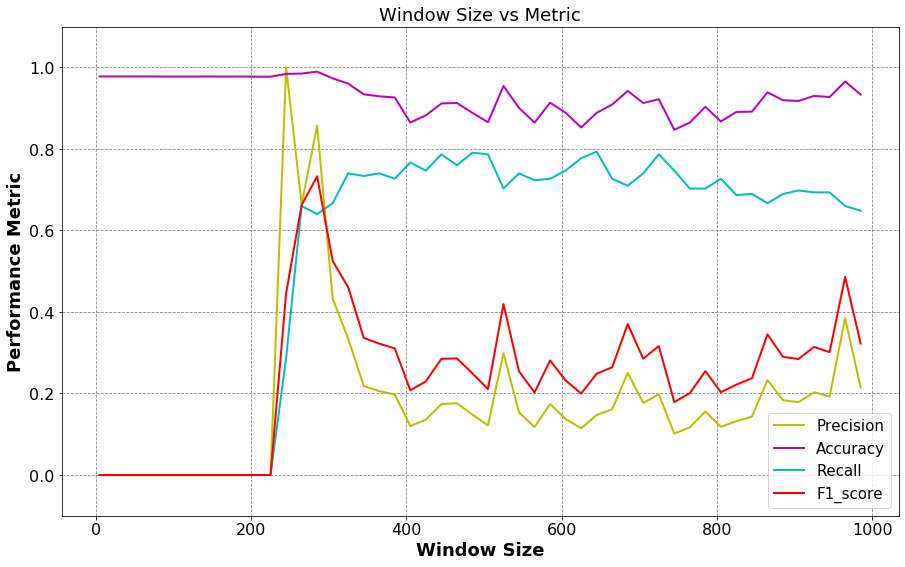

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')

Precision = ax.plot(window_size_list,precision_scores, color='y', linewidth=2)
Accuracy = ax.plot(window_size_list,accuracy_scores, color='m', linewidth=2)
Recall = ax.plot(window_size_list,recall_scores, color='c', linewidth=2)
F1_scores = ax.plot(window_size_list,f1_scores, color='r', linewidth=2)

ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Window Size vs Metric', fontsize=18)
ax.set_xlabel('Window Size', fontsize=18, weight = 'bold')
ax.set_ylabel('Performance Metric', fontsize=18, weight = 'bold')
ax.set_ylim(-.1, 1.1)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.legend(["Precision", "Accuracy", "Recall", "F1_score"], loc ="lower right", fancybox=True,facecolor='#FFFFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")

plt.savefig('window_iteration.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [26]:
k = np.argmax(f1_scores)
q = window_size_list[k]
q

285